In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
?MeshView

Object `MeshView` not found.


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
2.0


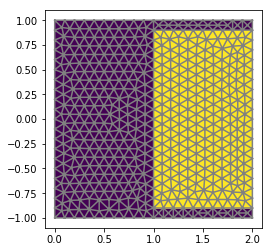

In [2]:
from pathlib import Path

import h5py
import numpy as np
import matplotlib.pyplot as plt
from dolfin import *

from neuralthreesome.meshprocessing import hdf2fenics, geo2hdf


geofile = "../resources/synapse-simple.geo"
meshfile = "../mesh/synapse-simple.h5"

geo2hdf(geofile, meshfile, cell_size=0.1, cleanup=False)
mesh, subdomain, boundaries = hdf2fenics(meshfile)

# Example list of tags from gmsh.
boundary_labels = {
    "pre": 1,
    "astrocytes": 2,
    "post-side": 3,
    "post-front": 4,
    "post-brdry": 5
}
subdomain_labels = {
    "ecs": 1,
    "post": 2,
}


# Define interior facet measure
dS = Measure("dS", domain=mesh, subdomain_data=boundaries)

# Choose tag for boundary to integrate over, and compute
boundary_tag = 3  # also possible with multiple tags (3, 4)
print(assemble(Constant(1.) * dS(boundary_tag)))

plot(mesh)
plot(subdomain)
plt.show()

In [3]:
f = Expression("x[0]*x[1]", degree=1)


from pathlib import Path
results = Path("../results")
results.mkdir(exist_ok=True)
test_vtk = File(str(results / "test_boundaries.pvd"))

V = FunctionSpace(mesh, "CG", 1)

for i in boundary_labels.values():
    domain = MeshView.create(boundaries, i)
    Vb = FunctionSpace(domain, "CG", 1)
    fb = project(f, Vb)
    fb.rename("boundary", "")
    test_vtk << fb

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
